# Fake News Detection

## Prerequisites

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read Datasets

In [6]:
fake = pd.read_csv(r"C:\Users\hp\Downloads\fake_news\Fake.csv")
true = pd.read_csv(r"C:\Users\hp\Downloads\fake_news\True.csv")

In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21417, 4)

## Data Preparation

In [9]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
# Check the data
data.head()

,title,text,subject,date,target
0,U.S. Congress may seek one-week funding extens...,WASHINGTON (Reuters) - The U.S. Congress inche...,politicsNews,"April 26, 2017",true
1,California Republicans lean to Trump but disli...,"SACRAMENTO, Calif. (Reuters) - About 38 percen...",politicsNews,"March 24, 2016",true
2,BEN CARSON Speaks Out On Trump Controversy…Dem...,Spoken like a true gentleman and warrior in Am...,left-news,"Oct 8, 2016",fake
3,STARBUCKS EMPLOYEE Calls Police On Man Wanting...,Starbucks SJWs call cops on customer for reque...,left-news,"Nov 17, 2016",fake
4,INT’L LEADERS CAN’T HIDE DISRESPECT For Obama ...,International leaders aren t making any secret...,politics,"Sep 5, 2016",fake


## Data Cleaning and Pre-processing

#### Removing the date

In [13]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,U.S. Congress may seek one-week funding extens...,WASHINGTON (Reuters) - The U.S. Congress inche...,politicsNews,true
1,California Republicans lean to Trump but disli...,"SACRAMENTO, Calif. (Reuters) - About 38 percen...",politicsNews,true
2,BEN CARSON Speaks Out On Trump Controversy…Dem...,Spoken like a true gentleman and warrior in Am...,left-news,fake
3,STARBUCKS EMPLOYEE Calls Police On Man Wanting...,Starbucks SJWs call cops on customer for reque...,left-news,fake
4,INT’L LEADERS CAN’T HIDE DISRESPECT For Obama ...,International leaders aren t making any secret...,politics,fake


#### Removing the title (we will only use the text)

In [14]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The U.S. Congress inche...,politicsNews,true
1,"SACRAMENTO, Calif. (Reuters) - About 38 percen...",politicsNews,true
2,Spoken like a true gentleman and warrior in Am...,left-news,fake
3,Starbucks SJWs call cops on customer for reque...,left-news,fake
4,International leaders aren t making any secret...,politics,fake


#### Convert to lowercase

In [15]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the u.s. congress inche...,politicsNews,true
1,"sacramento, calif. (reuters) - about 38 percen...",politicsNews,true
2,spoken like a true gentleman and warrior in am...,left-news,fake
3,starbucks sjws call cops on customer for reque...,left-news,fake
4,international leaders aren t making any secret...,politics,fake


### Removing Punctuation

In [16]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,subject,target
0,washington reuters the us congress inched tow...,politicsNews,true
1,sacramento calif reuters about 38 percent of ...,politicsNews,true
2,spoken like a true gentleman and warrior in am...,left-news,fake
3,starbucks sjws call cops on customer for reque...,left-news,fake
4,international leaders aren t making any secret...,politics,fake


## Removing Stopwords

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,text,subject,target
0,washington reuters us congress inched toward d...,politicsNews,true
1,sacramento calif reuters 38 percent california...,politicsNews,true
2,spoken like true gentleman warrior america fig...,left-news,fake
3,starbucks sjws call cops customer requesting t...,left-news,fake
4,international leaders making secret disdain la...,politics,fake


## Tokenization

In [19]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector) 

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

### Most frequent words in fake news

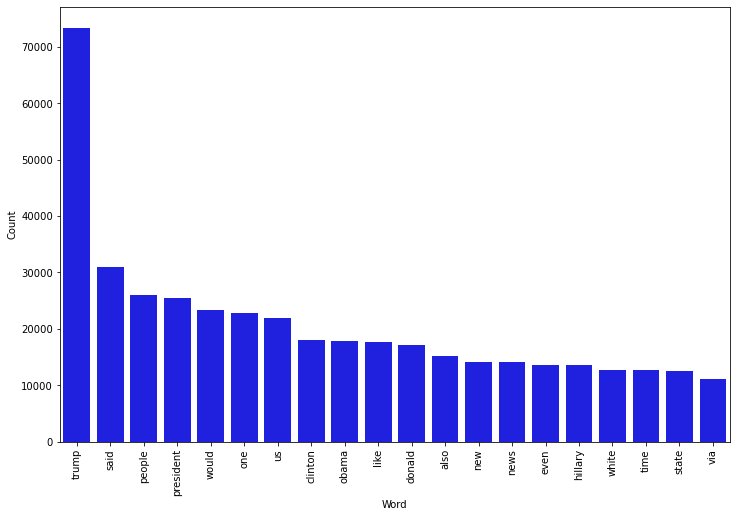

In [20]:
counter(data[data["target"] == "fake"], "text", 20)

### Most frequent words in real news

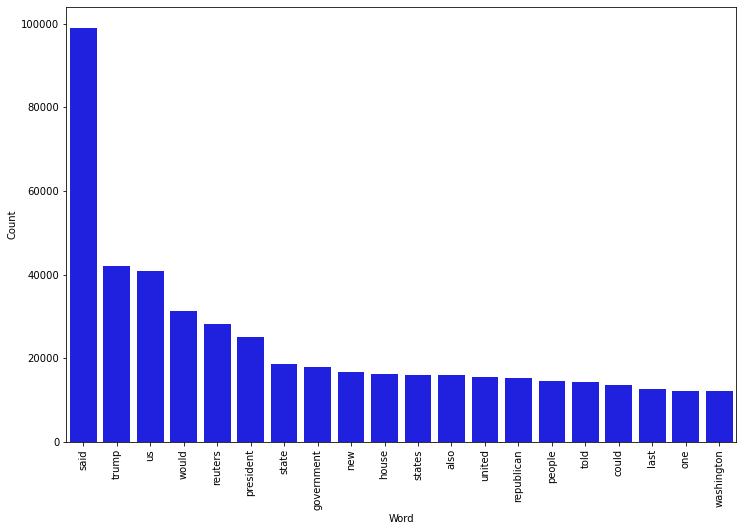

In [21]:
counter(data[data["target"] == "true"], "text", 20)

## Wordcloud Generation

### Installing and Importing "wordcloud"

In [22]:
import sys
print(sys.executable)

C:\Users\hp\anaconda3\python.exe


In [23]:
!C:\Users\hp\anaconda3\python -m pip install wordcloud

## Word cloud for Fake News

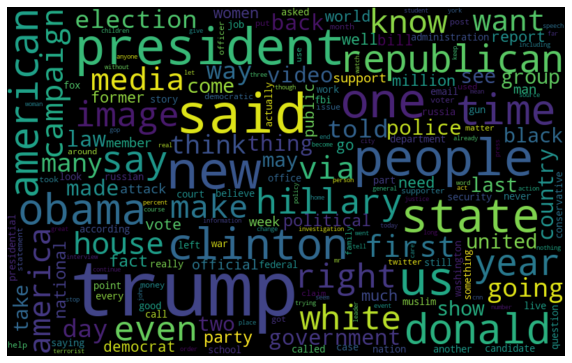

In [24]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud for Real News

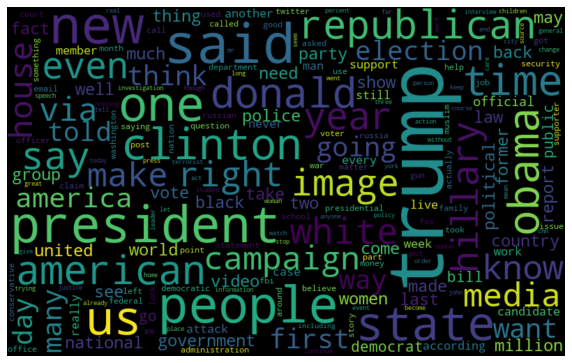

In [25]:
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modelling

In [26]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Preparing the Data

In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2,random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35918,) (35918,)
(8980,) (8980,)


### Logistic Regression

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.92%


### Confusion Matrix

Confusion matrix, without normalization


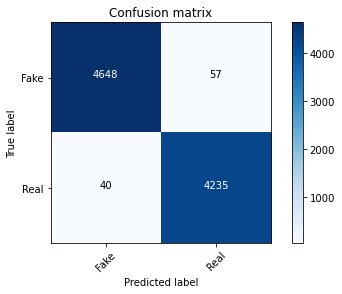

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])